In [49]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [41]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# LODING MODELS

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Jarvis/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-8 Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detection

In [20]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Virat_Kohli_Batting.jpg/1920px-Virat_Kohli_Batting.jpg'

In [21]:
results = model(img)
results.print()

image 1/1: 1116x1920 6 persons, 1 sports ball, 1 baseball bat
Speed: 6202.9ms pre-process, 248.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


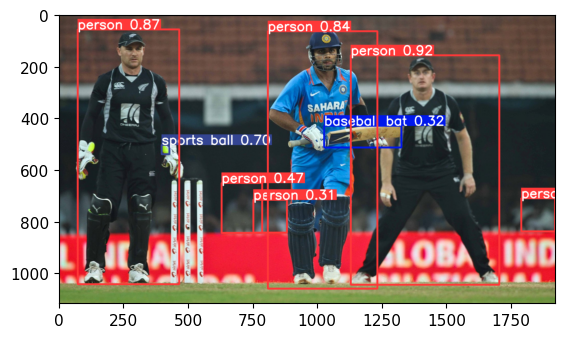

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
np.array(results.render()).shape

(1, 1116, 1920, 3)

# Real Time detection

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Training from scratch

In [28]:
import uuid   # Unique identifier
import os
import time

In [30]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [32]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [33]:
!git clone "https://github.com/HumanSignal/labelImg"

Cloning into 'labelImg'...


In [39]:
!pip install pyqt5 lxml --upgrade
!cd labelImg 
!pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl (6.8 MB)
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.9
    Uninstalling PyQt5-5.15.9:
      Successfully uninstalled PyQt5-5.15.9


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyqt5-plugins 5.15.9.2.3 requires pyqt5==5.15.9, but you have pyqt5 5.15.10 which is incompatible.
pyqt5-tools 5.15.9.3.3 requires pyqt5==5.15.9, but you have pyqt5 5.15.10 which is incompatible.
'pyrcc5' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: cannot change to 'C:\Users\Jarvis\Desktop\All': No such file or directory
YOLOv5  2023-11-8 Python-3.11.4 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, trans

# Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Jarvis/.cache\torch\hub\master.zip
YOLOv5  2023-11-13 Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [60]:
img = os.path.join('data', 'images', 'drowsy.4da9bffd-7d9d-11ee-bac5-90e8684b37c4.jpg')

In [61]:
results = model(img)

In [62]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 10.0ms pre-process, 218.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


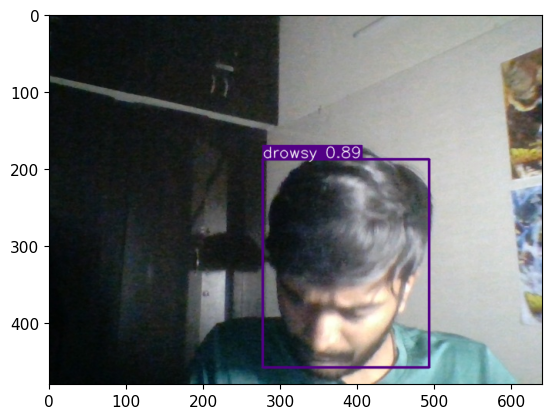

In [63]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [66]:
img = os.path.join('data', 'images', 'awake.3c278e39-7d9d-11ee-9b33-90e8684b37c4.jpg')

In [67]:
results = model(img)

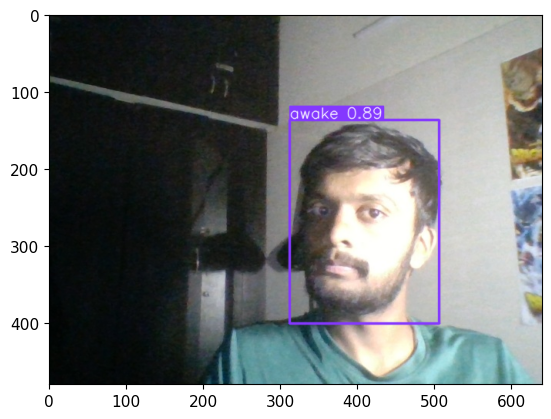

In [68]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import unittest
from yolo.data import data

class TestDataPreparation(unittest.TestCase):
    def test_prepare_data(self):
        # Mock data paths or use 0sample data
        images_path = "data/imagess"
        annotations_path = "data/lableImg/lable"

        # Call the function under test
        result = prepare_data(images_path, annotations_path)

        # Define expected output or behavior
        expected_result = "processed_data"
        
        # Perform the assertion
        self.assertEqual(result, expected_result)

if __name__ == '__main__':
    unittest.main()
